In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rapidfuzz import fuzz

In [2]:
df = pd.read_csv("job_offers.csv")

In [3]:
df

,job_title,job_Desc
0,AI Engineer,About the job\nROCKET9 🌌 is at the forefront o...
1,Machine Learning Engineer,About the job\nCompany Description\nInnovacio ...
2,Artificial Intelligence Engineer,About the job\nA.I. specialist\n2PI AI Tech is...
3,AI Developer,About the job\nCompany Description\nVitwit is ...
4,AI/ ML Engineer,About the job\nAbout us:\n\nWe are experts who...
...,...,...
145,XR Systems Technology Engineer,About the job\nCompany:\n\nQualcomm India Priv...
146,Machine Learning Engineer,About the job\nGeneral Summary: \nThe Machine ...
147,AI / ML Developer (Standard),About the job\nExperience\n\nROLES & RESPONSIB...
148,Solution Engineer - AI and Data analytics,About the job\nTo get the best candidate exper...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job_title  150 non-null    object
 1   job_Desc   150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [5]:
df.head()

,job_title,job_Desc
0,AI Engineer,About the job\nROCKET9 🌌 is at the forefront o...
1,Machine Learning Engineer,About the job\nCompany Description\nInnovacio ...
2,Artificial Intelligence Engineer,About the job\nA.I. specialist\n2PI AI Tech is...
3,AI Developer,About the job\nCompany Description\nVitwit is ...
4,AI/ ML Engineer,About the job\nAbout us:\n\nWe are experts who...


In [6]:
df['job_title'].unique()

array(['AI Engineer', 'Machine Learning Engineer',
       'Artificial Intelligence Engineer', 'AI Developer',
       'AI/ ML Engineer', 'AI/ML Engineer',
       'Intern/Computer Vision Engineer',
       'Scientific Python Developer (Astronomy and AI Focus)',
       'Python Developer (AI Focus)', 'Big Data Engineer',
       'Deep Learning Engineer (Computer Vision & NLP)',
       'Open AI Chatbot Developer with Azure',
       'Interesting Job Opportunity: WorldCare Clinical - Artificial Intelligence Engineer - Machine Learning Models',
       'Computer Vision Engineer', 'Algorithm Engineer',
       'Machine Learning Engineer III',
       'Senior Artificial Intelligence Engineer',
       'Artificial Intelligence /Machine Learning & Language Model Developer',
       'Generative AI Engineer', 'Machine Learning Architect',
       'Data Science Engineer/Senior Data Science Engineer - Python/Machine Learning',
       'Lead Generative AI Engineer - Large-Scale AI Model (India)',
       'Artifi

In [7]:
len(df['job_title'].unique())


89

there are alot of unique titles , so we have to generalize titles to get better analysis

there can be same job posted multiple times so its better to remove duplicacy

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
len(df)

137

size of dataframe decrease from 150 to 137 after removing duplicate items

#### Generalization of titles

few titles use abbreviations and few uses full form so its better to replace abbreviations

In [10]:
df['title']=df['job_title'].apply(lambda x : x.replace('AI' , 'Artificial Intelligence'))
df['title']=df['title'].apply(lambda x : x.replace('ML' , 'Machine Learning'))
df['title']=df['title'].apply(lambda x : x.replace('Gen ' , 'Generative '))


In [11]:
def replace_title(title):
    # Lowercase the titles first to keep consistency    
    if 'Artificial Intelligence' in title and 'Machine Learning' in title and '/' in title:
        return 'Artificial Intelligence and Machine Learning Engineer'
    elif 'Data Scientist' in title:
        return 'Data Scientist'
    elif  'Senior Machine Learning Engineer' in title:
        return  'Senior Machine Learning Engineer'
    elif 'Senior Machine Learning Engineer' in title:
        return 'Senior Machine Learning Engineer'
    elif 'Python Developer' in title:
        return 'Python Developer'
    elif 'Generative' and 'Artificial' and 'Intelligence' and 'Developer' in title:
        return 'Generative Artificial Intelligence developer'
    else:
        return title
    

In [12]:
df['title'] = df['title'].apply(replace_title)

In [13]:
def replace_title(title):
    # Lowercase the titles first to keep consistency    
    if 'Artificial Intelligence' in title and 'Machine Learning' in title and 'and' in title:
        return 'Artificial Intelligence and Machine Learning Engineer'
    elif 'Generative Artificial Intelligence Engineer' in title:
        return 'Generative Artificial Intelligence Engineer'
    elif 'Artificial Intelligence' in title and 'Machine Learning' in title:
        return 'Artificial Intelligence and Machine Learning Engineer'
    elif 'Senior' in title and 'Artificial Intelligence' in title :
         return 'Senior Artificial Intelligence Engineer'
    elif 'Senior' in title and 'Machine Learning' in title :
         return 'Senior Machine Learning Engineer'
    elif 'Lead' in title and 'Artificial Intelligence' in title :
         return 'Lead Artificial Intelligence Engineer'
    elif 'Lead' in title and 'Machine Learning' in title :
         return 'Lead Machine Learning Engineer'
    elif 'Intern' in title and 'Artificial Intelligence' in title :
         return 'Intern Artificial Intelligence Engineer'
    elif 'Intern' in title and 'Machine Learning' in title :
         return 'Intern Machine Learning Engineer'
    elif 'Machine Learning Engineer' in title :
        return 'Machine Learning Engineer'
    elif 'Artificial Intelligence Engineer' in title :
        return 'Artificial Intelligence Engineer'
    else:
        return title

In [14]:
df['title'] = df['title'].apply(replace_title)

In [15]:
len(df['title'].unique())

40

We can see unique titles decreased to half after generalizing them

In [16]:
df['title'].unique()

array(['Artificial Intelligence Engineer', 'Machine Learning Engineer',
       'Generative Artificial Intelligence developer',
       'Artificial Intelligence and Machine Learning Engineer',
       'Intern/Computer Vision Engineer', 'Python Developer',
       'Big Data Engineer',
       'Deep Learning Engineer (Computer Vision & NLP)',
       'Computer Vision Engineer', 'Algorithm Engineer',
       'Senior Artificial Intelligence Engineer',
       'Generative Artificial Intelligence Engineer',
       'Machine Learning Architect', 'Senior Machine Learning Engineer',
       'Engineer 1, Machine Learning', 'Machine Learning Ops Engineer',
       'Generative Artificial Intelligence Research Research Engineer',
       'Artificial Intelligence Frameworks Engineer', 'Ai/NLP Engineer',
       'Artificial Intelligence Research Engineer',
       'Artificial Intelligence Ops Solutions Engineer',
       'Artificial Intelligence Infrastructure Engineer',
       'Business Intel Engineer I, Global Op

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

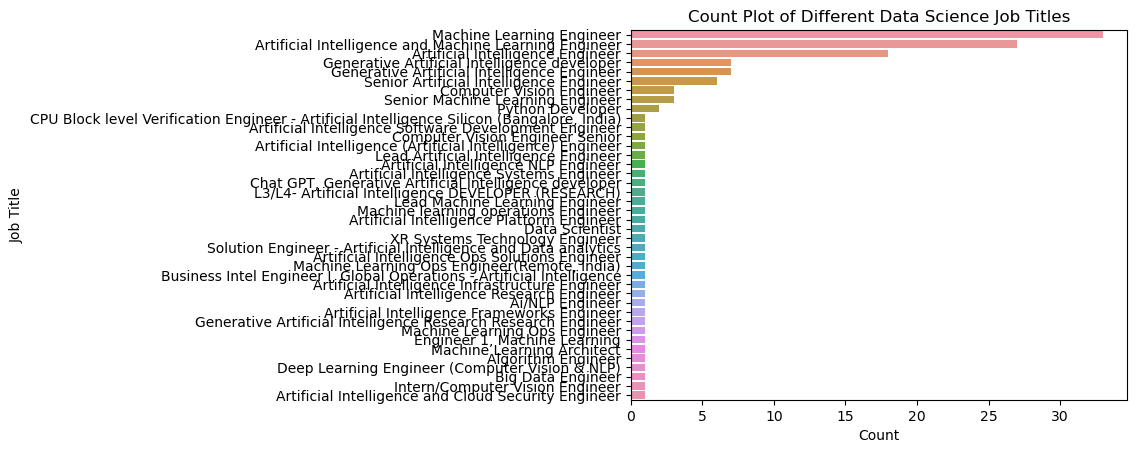

In [18]:
# Plot histogram of the different job titles in the dataset
sns.countplot(y= 'title', data = df, order = df['title'].value_counts().index)

# Add labels and titles
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Count Plot of Different Data Science Job Titles')

plt.show()

We can see most Jobs are from ML engineer which are 30+ followed by AI/ML and AI jobs 

Extracting skills and tools from job description

In [19]:


# list of skills to match
tools = ["Python","R","SQL","Jupyter","NumPy","Pandas","Matplotlib","Seaborn",
                      "SciPy","Scikit-Learn","TensorFlow","PyTorch","Keras","XGBoost","LightGBM",
                      "Plotly","Dask","Spark","Hadoop","AWS","Google Cloud",
                      "Azure","IBM Watson","NLTK","OpenCV","Gensim","StatsModels",
                      "Theano","Caffe","Keras-Tuner","Auto-Keras","Auto-Sklearn","Shap","ELI5","Bokeh",
                      "Folium","ggplot","plotnine","Geopandas","Datashader","Yellowbrick","H2O.ai","Flask",
                      "Dash","Streamlit","FastAPI","PySpark","TensorBoard","cuDF","NetworkX","BeautifulSoup",
                      "Scrapy","Numba","Cython", "Apache", "Git"]

Skills = ["Python programming", "Statistics" ,"Probability", "Machine learning","Data visualization","preprocessing" "cleaning","database management", "analysis", "modeling",    
         "Deep learning","Data engineering", "visualization", "manipulation", "Machine learning", "storage", "Cloud computing", "ETL",    
         "warehousing","governance", "security","storytelling", "product development", "Natural language processing", "NLP",    
         "Computer vision", "Business intelligence", "mining","feature engineering", "Time series analysis", "Regression analysis", "Classification algorithms",    
         "Clustering algorithms", "Neural networks", "Decision trees", "random forests", "Support vector machines", "SVM", "K-nearest neighbors", "KNN", "Reinforcement learning","Hyperparameter tuning",    
         "Ensemble learning", "Transfer learning", "Unsupervised learning","Supervised learning","Exploratory data analysis", "EDA", "quality control",    
         "Data interpretation", "Collaboration", "communication", "Project management", "Agile development", "Software engineering", "Version control", "Debugging", "troubleshooting",
         "Continuous integration and deployment (CI/CD)", "optimization", 'deployment']


def match_phrases(description, phrases):
    matched_phrase = [phrase for phrase in phrases if fuzz.partial_token_set_ratio(description, phrase) >= 90]
    # Only return matches once
    unique_matches = list(set(matched_phrase))
    return unique_matches


In [20]:
df['Tools'] = df['job_Desc'].apply(lambda x: match_phrases(x, tools))

In [21]:
import collections
# Visualization functions
    
# Function used to generate countplot 
def generate_countplot(df, column, top_n = None):
    words = [word for row in df[column] for word in row]
    
    counter = collections.Counter(words)
    
    top_n_words = [word for word, count in counter.most_common(top_n)]
    
    plt.figure(figsize = (10,5))
    
    sns.countplot(x = words, order = top_n_words)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.show()

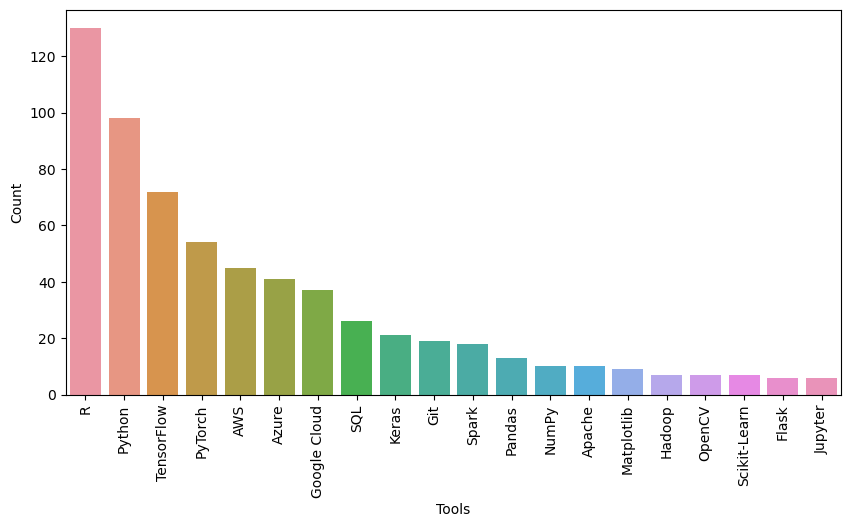

In [22]:
generate_countplot(df, 'Tools', 20)

R is most common tool required in market followed by python which are two languages required in field of ai
TensorFlow and Pytorch are framework or libraries required
AWS , Azure and Google Cloud are cloud computing interfaces used for managing and deploying cloud application

we can see that a good ai engineer require this skils 

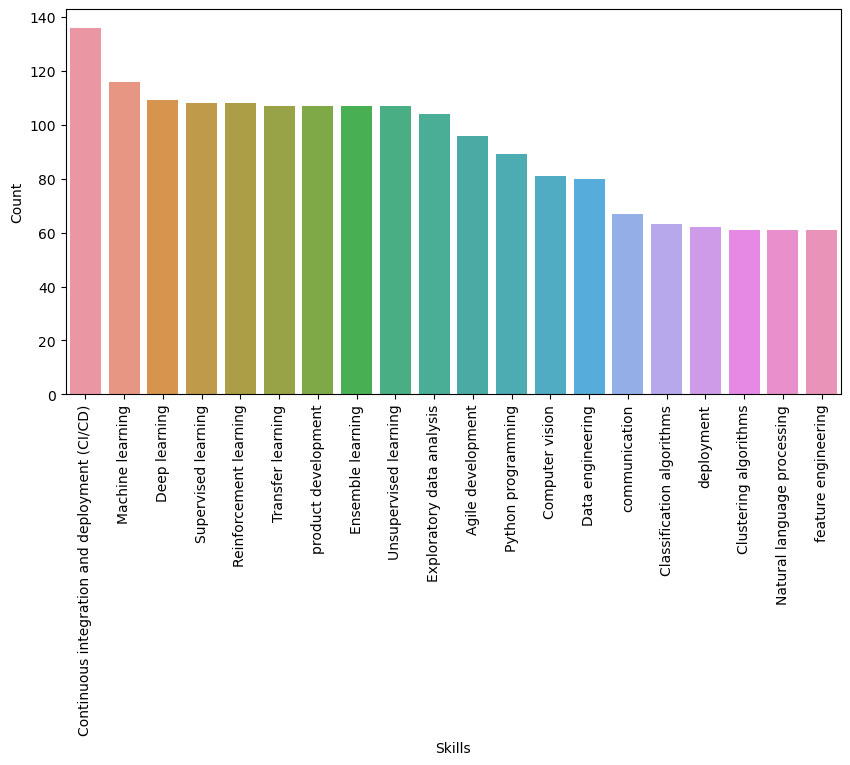

In [23]:
df['Skills'] = df['job_Desc'].apply(lambda x: match_phrases(x, Skills))
generate_countplot(df, 'Skills', 20)

ci/cd is the most common skill/task in this field 

In [24]:
df

,job_title,job_Desc,title,Tools,Skills
0,AI Engineer,About the job\nROCKET9 🌌 is at the forefront o...,Artificial Intelligence Engineer,"[Python, TensorFlow, PyTorch, R]","[Clustering algorithms, Classification algorit..."
1,Machine Learning Engineer,About the job\nCompany Description\nInnovacio ...,Machine Learning Engineer,[R],"[Agile development, Software engineering, Tran..."
2,Artificial Intelligence Engineer,About the job\nA.I. specialist\n2PI AI Tech is...,Artificial Intelligence Engineer,[Python],"[Clustering algorithms, Classification algorit..."
3,AI Developer,About the job\nCompany Description\nVitwit is ...,Generative Artificial Intelligence developer,"[AWS, R, Python, TensorFlow, Azure, NumPy, PyT...","[Agile development, quality control, Transfer ..."
4,AI/ ML Engineer,About the job\nAbout us:\n\nWe are experts who...,Artificial Intelligence and Machine Learning E...,"[AWS, R, Python, Azure, PyTorch, TensorFlow]","[Agile development, quality control, Transfer ..."
...,...,...,...,...,...
144,Machine Learning Engineer,About the job\nYour work days are brighter her...,Machine Learning Engineer,"[Spark, AWS, SQL, Python, R]","[quality control, Software engineering, Transf..."
145,XR Systems Technology Engineer,About the job\nCompany:\n\nQualcomm India Priv...,XR Systems Technology Engineer,[R],"[quality control, Software engineering, Transf..."
146,Machine Learning Engineer,About the job\nGeneral Summary: \nThe Machine ...,Machine Learning Engineer,"[Spark, AWS, SQL, Python, R, Apache, Git]","[Agile development, Supervised learning, Natur..."
147,AI / ML Developer (Standard),About the job\nExperience\n\nROLES & RESPONSIB...,Artificial Intelligence and Machine Learning E...,"[TensorFlow, Azure, R]","[Software engineering, NLP, feature engineerin..."


In [25]:

def extract_education_level(description):
    # Dictionary that maps education levels to their abbreviations
    education_levels = {
        'bachelor': ['bs', 'bachelor'],
        'master': ['ms', 'master'],
        'phd': ['phd'],
        'doctorate': ['doctorate']
    }
    # initialize the education level and maximum ratio to 0
    education_level = None
    max_ratio = 0
    # iterate over the education levels and their abbreviations
    for level, abbreviations in education_levels.items():
        level_variants = [level] + abbreviations
        for variant in level_variants:
            # calculate the fuzzy matching ratio between the variant and the job description
            ratio = fuzz.partial_token_set_ratio(variant, description)
            if ratio > max_ratio:
                max_ratio = ratio
                education_level = level
    if max_ratio >= 80:
        return education_level
    else:
        return 'Not Specified'
    
df['qualifications'] = df['job_Desc'].apply(extract_education_level)

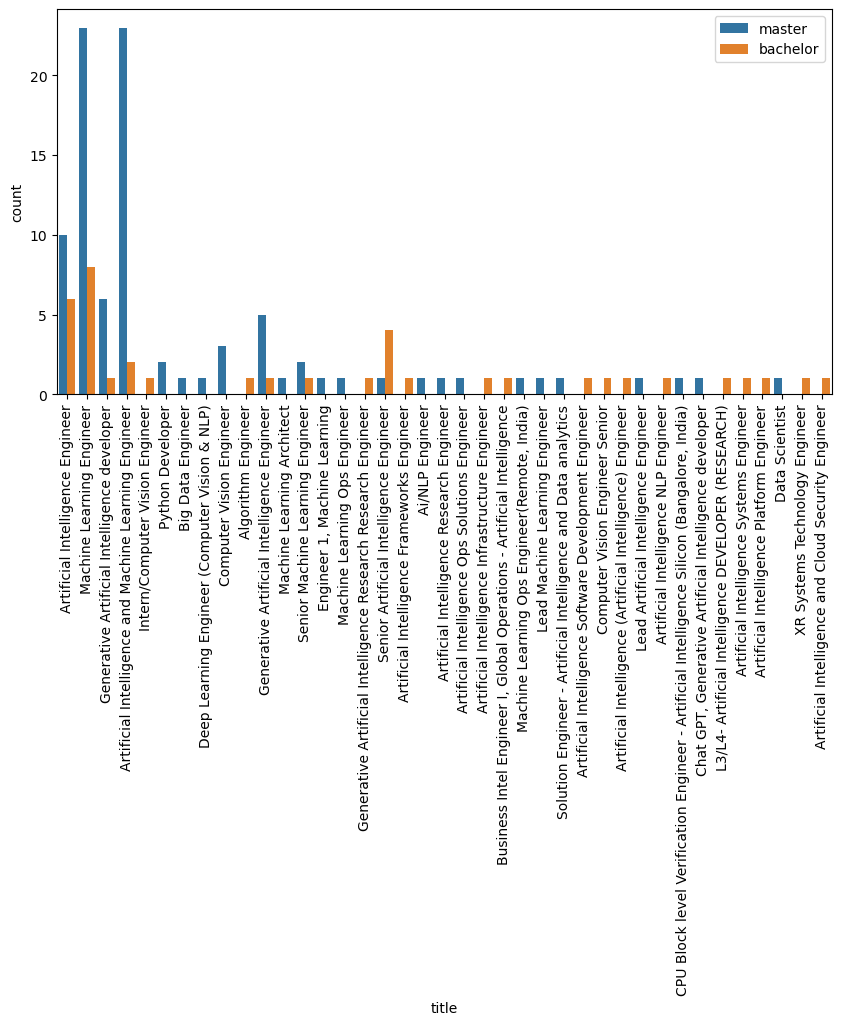

In [26]:
# Set size of figure
plt.figure(figsize = (10,5))

sns.countplot(data = df[df['qualifications'] != 'Not Specified'], x = 'title', hue = 'qualifications')
# rotate the x-axis labels by 90 degrees
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.show()

In [27]:
import re
def extract_years_of_experience(description):
    # Regular expression pattern to match the years of experience information
    pattern = re.compile(r'(\d+)\s*years?', re.IGNORECASE)
    
    # search for the pattern in the job description
    match = re.search(pattern, description)
    
    # if there is a match, return the matched string
    if match:
        return match.group(0)
    else:
        return "Not Specified"
    
df['Years_of_Experience'] = df['job_Desc'].apply(extract_years_of_experience)
df['years'] = df['Years_of_Experience'].str.extract(r'(\d+)').fillna(0).astype(int)

In [28]:
df['years'].value_counts()

years
0      79
2      11
5       9
3       7
10      7
7       6
8       5
1       3
4       3
12      1
40      1
50      1
13      1
20      1
180     1
6       1
Name: count, dtype: int64

we can see most of jobs requires no experience because data set had very less senior jobs 
we can see a jobs demand 0-7 years of experience 

Text Filtering and Nlp Analysis


In [29]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from rake_nltk import Metric, Rake
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
stop=stopwords.words('english')

# Text to compare

These are few ai generated resumes which will be used for comparisions of cosine similarity score output generated by various model

In [31]:
text_Python_developer="""[Your Name]
[Your Address]
[City, State, ZIP Code]
[Your Email Address]
[Your Phone Number]
[LinkedIn Profile: linkedin.com/in/yourprofile]
[GitHub Profile: github.com/yourusername]

Objective:
---------
Passionate and detail-oriented Python Developer with [X years] of experience creating and implementing innovative software solutions. Adept at collaborating with cross-functional teams to drive project success. Seeking a challenging role to leverage my skills in Python development, problem-solving, and software architecture.

Education:
----------
Bachelor of Science in Computer Science
[University Name], [City, State]
[Month Year] - [Month Year]

Skills:
-------
Programming Languages: Python, JavaScript
Web Development: Django, Flask, HTML, CSS, Bootstrap
Database Management: PostgreSQL, MySQL, MongoDB
Version Control: Git, GitHub
API Development: RESTful API, GraphQL
Testing: Unit Testing, Test-Driven Development (TDD)
Tools: Docker, Jenkins, VS Code, Jupyter Notebook
Other: Agile/Scrum, Software Architecture, Problem Solving

Professional Experience:
-----------------------
Software Developer | [Company Name], [City, State] | [Month Year] - Present
- Develop and maintain web applications using Django and Flask frameworks.
- Collaborate with front-end developers to integrate user-facing elements with server-side logic.
- Design and implement database models and ensure the integrity of data.
- Participate in code reviews to maintain code quality and adherence to coding standards.
- Work closely with the QA team to identify and fix bugs and issues.

Junior Python Developer | [Previous Company], [City, State] | [Month Year] - [Month Year]
- Assisted in the development and maintenance of internal tools and applications.
- Collaborated with team members to identify and implement software solutions.
- Participated in the design and implementation of database structures.
- Conducted code reviews and contributed to continuous improvement initiatives.

Projects:
---------
1. E-Commerce Platform
   - Developed a scalable e-commerce platform using Django, allowing users to browse products, add items to the cart, and complete transactions securely.

2. Task Management System
   - Created a web-based task management system using Flask, enabling users to create, assign, and track tasks within a collaborative environment.

3. Data Analysis Dashboard
   - Developed a data analysis dashboard using Python and Jupyter Notebook, providing insights into key performance indicators through visualizations.

Certifications:
---------------
- Python Developer Certification, [Certification Authority], [Month Year]
- Web Development with Django, [Certification Authority], [Month Year]

Professional Memberships:
-------------------------
- Member, Python Software Foundation
- Member, Association for Computing Machinery (ACM)

References:
-----------
Available upon request.

Note: Tailor this resume to your specific experiences and achievements. Make sure to provide quantifiable results and highlight your impact in each role. Adjust the skills section based on your proficiency level and the requirements of the job you're applying for."""

In [32]:
text_data_scientist_lead ="""[Your Name]
[Your Address]
[City, State, ZIP Code]
[Your Email Address]
[Your Phone Number]
[LinkedIn Profile: linkedin.com/in/yourprofile]
[GitHub Profile: github.com/yourusername]

Objective:
---------
Experienced and results-driven Data Scientist Lead with a proven track record in leveraging advanced analytics and machine learning to drive business insights and innovation. Adept at leading cross-functional teams, developing analytical models, and implementing data-driven strategies. Seeking a challenging role to contribute leadership and technical expertise to a dynamic organization.

Education:
----------
Master of Science in Data Science
[University Name], [City, State]
[Month Year] - [Month Year]

Bachelor of Science in [Relevant Field]
[University Name], [City, State]
[Month Year] - [Month Year]

Skills:
-------
Programming Languages: Python, R
Data Analysis: Pandas, NumPy
Machine Learning: Scikit-learn, TensorFlow, Keras
Statistical Analysis: Hypothesis Testing, Regression Analysis
Big Data Technologies: Spark, Hadoop
Data Visualization: Matplotlib, Seaborn, Tableau
Database Management: SQL, MongoDB
Deep Learning: Neural Networks, CNNs, RNNs
Model Deployment: Flask, Docker
Leadership: Project Management, Team Collaboration
Tools: Jupyter Notebook, Git, Confluence, Jira

Professional Experience:
-----------------------
Data Scientist Lead | [Company Name], [City, State] | [Month Year] - Present
- Lead a team of data scientists in developing and implementing machine learning models to solve business problems.
- Collaborate with stakeholders to define project goals and ensure alignment with business objectives.
- Oversee the end-to-end data science lifecycle, from data collection and cleaning to model development and deployment.
- Implement best practices for data exploration, feature engineering, and model evaluation.
- Provide technical guidance and mentorship to team members, fostering a culture of innovation and continuous learning.
- Communicate complex technical concepts to non-technical stakeholders to drive data-driven decision-making.

Senior Data Scientist | [Previous Company], [City, State] | [Month Year] - [Month Year]
- Developed predictive models for customer churn, demand forecasting, and other business-critical applications.
- Conducted exploratory data analysis to uncover insights and patterns in large datasets.
- Collaborated with cross-functional teams to integrate data science solutions into business processes.
- Presented findings and recommendations to leadership, contributing to strategic decision-making.

Projects:
---------
1. Predictive Maintenance System
   - Led a team in developing a predictive maintenance model using machine learning to reduce equipment downtime and maintenance costs.

2. Customer Segmentation and Personalization
   - Implemented a customer segmentation model to personalize marketing campaigns, resulting in a [X]% increase in customer engagement.

3. Fraud Detection System
   - Developed and deployed a fraud detection system using advanced analytics, reducing fraudulent transactions by [X]%.

Certifications:
---------------
- Certified Analytics Professional (CAP)
- TensorFlow Developer Certificate
- Project Management Professional (PMP)

Professional Memberships:
-------------------------
- Member, Institute for Operations Research and the Management Sciences (INFORMS)
- Member, Data Science Association

References:
-----------
Available upon request.

Note: Tailor this resume to your specific experiences and achievements. Highlight your leadership skills, successful projects, and any quantifiable results you've achieved. Adjust the skills section based on your proficiency level and the requirements of the job you're applying for."""

In [33]:
text_ai_engineer="""[Your Name]  
[Your Address]  
[City, State, ZIP Code]  
[Your Email Address]  
[Your Phone Number]  
[LinkedIn Profile: linkedin.com/in/yourprofile]  
[GitHub Profile: github.com/yourusername]

Objective:  
---------  
Results-driven and highly skilled Senior AI Engineer with a strong background in artificial intelligence, machine learning, and deep learning. Proven experience in designing and implementing cutting-edge AI solutions to solve complex business problems. Seeking a challenging role to leverage my expertise in leading AI initiatives and contributing to the development of innovative technologies.

Education:  
----------  
Master of Science in Computer Science (Specialization in Artificial Intelligence)  
[University Name], [City, State]  
[Month Year] - [Month Year]

Bachelor of Science in [Relevant Field]  
[University Name], [City, State]  
[Month Year] - [Month Year]

Skills:  
-------  
Programming Languages: Python, Java, C++
Machine Learning Frameworks: TensorFlow, PyTorch, Scikit-learn
Deep Learning: Neural Networks, CNNs, RNNs, GANs
Natural Language Processing (NLP): SpaCy, NLTK, BERT
Computer Vision: OpenCV, ImageNet, Object Detection
Reinforcement Learning: DQN, PPO, A3C
Data Processing and Analysis: Pandas, NumPy
Model Deployment: TensorFlow Serving, Docker
Version Control: Git, GitHub
Cloud Platforms: AWS, Azure, GCP
Collaboration Tools: Jira, Confluence

Professional Experience:  
-----------------------  
Senior AI Engineer | [Company Name], [City, State] | [Month Year] - Present  
- Lead the design and development of AI-driven solutions, including natural language processing applications, computer vision systems, and recommendation engines.
- Collaborate with cross-functional teams to define project requirements, scope, and deliverables.
- Conduct research on emerging AI technologies and integrate them into existing systems to enhance performance.
- Mentor and guide junior AI engineers, fostering a culture of continuous learning and innovation.
- Work closely with stakeholders to identify opportunities for AI implementation and provide technical expertise for project planning.

AI Engineer | [Previous Company], [City, State] | [Month Year] - [Month Year]  
- Developed and implemented machine learning models for predictive analytics, anomaly detection, and pattern recognition.
- Contributed to the design and implementation of computer vision algorithms for image recognition and object detection.
- Collaborated with software engineers to integrate AI models into production systems, ensuring scalability and reliability.
- Conducted performance optimization and troubleshooting for AI applications.

Projects:  
---------  
1. Intelligent Virtual Assistant  
   - Led the development of an intelligent virtual assistant using natural language processing and machine learning, resulting in a [X]% improvement in user satisfaction.

2. Computer Vision-Based Quality Control  
   - Implemented a computer vision system for automated quality control in manufacturing, reducing defects by [X]%.

3. Reinforcement Learning for Autonomous Systems  
   - Spearheaded a project to apply reinforcement learning techniques to train autonomous systems, optimizing decision-making in dynamic environments.

Certifications:  
---------------  
- AI Engineer Certification, [Certification Authority], [Month Year]  
- AWS Certified Machine Learning - Specialty  

Professional Memberships:  
-------------------------  
- Member, Association for the Advancement of Artificial Intelligence (AAAI)  
- Member, Institute of Electrical and Electronics Engineers (IEEE)

References:  
-----------  
Available upon request.

Note: Tailor this resume to your specific experiences and achievements. Highlight your leadership skills, successful projects, and any quantifiable results you've achieved. Adjust the skills section based on your proficiency level and the requirements of the job you're applying for."""

In [34]:
text_mechanical_eng="""[Your Name]
[Your Address]
[City, State, ZIP Code]
[Your Email Address]
[Your Phone Number]
[LinkedIn Profile: linkedin.com/in/yourprofile]

Objective:
---------
Dedicated and results-oriented Mechanical Engineer with a strong background in designing, analyzing, and testing mechanical systems. Adept at utilizing engineering principles to solve complex problems and improve processes. Seeking a challenging role where I can apply my skills in mechanical design, project management, and innovation to contribute to the success of a dynamic organization.

Education:
----------
Bachelor of Science in Mechanical Engineering
[University Name], [City, State]
[Month Year] - [Month Year]

Skills:
-------
Technical Skills:
- SolidWorks, AutoCAD, CATIA
- Finite Element Analysis (FEA)
- GD&T, Tolerance Analysis
- Thermodynamics, Heat Transfer
- Fluid Mechanics, HVAC
- Machine Design, Materials Science
- CNC Programming

Software Proficiency:
- MATLAB, Simulink
- Microsoft Office Suite (Excel, Word, PowerPoint)
- ANSYS, COMSOL Multiphysics

Project Management:
- Project Planning and Execution
- Budgeting and Cost Analysis
- Risk Management
- Cross-functional Collaboration

Professional Experience:
-----------------------
Mechanical Engineer | [Current Company], [City, State] | [Month Year] - Present
- Lead the design and development of mechanical components for [specific products/systems].
- Conduct finite element analysis (FEA) to optimize designs for strength, durability, and performance.
- Collaborate with cross-functional teams, including manufacturing and quality assurance, to ensure successful product launches.
- Participate in design reviews and provide technical support to junior engineers.
- Develop and maintain documentation, including engineering drawings, specifications, and reports.

Assistant Mechanical Engineer | [Previous Company], [City, State] | [Month Year] - [Month Year]
- Assisted in the design and analysis of mechanical systems, ensuring compliance with industry standards and regulations.
- Collaborated with manufacturing teams to troubleshoot and resolve production issues.
- Conducted root cause analysis for failures and implemented corrective actions.
- Contributed to the development of new product concepts through prototyping and testing.

Projects:
---------
1. [Project Name]: Design and Optimization of [specific component/system]
   - Led a team in designing and optimizing a critical component, resulting in a [X]% improvement in efficiency.

2. [Project Name]: Implementation of Lean Manufacturing Principles
   - Spearheaded the implementation of lean manufacturing practices, reducing production lead times by [X]%.

3. [Project Name]: Thermal Analysis of [specific system]
   - Conducted thermal analysis using ANSYS to optimize the cooling system, improving overall performance.

Certifications:
---------------
- Professional Engineer (PE) License, [Issuing Authority], [Year]
- Certified SolidWorks Professional (CSWP)

Professional Memberships:
-------------------------
- Member, American Society of Mechanical Engineers (ASME)
- Member, Society of Automotive Engineers (SAE)

References:
-----------
Available upon request.

Note: Customize this resume to match your specific experiences, achievements, and the requirements of the job you're applying for. Highlight any relevant projects, technical skills, and certifications that demonstrate your expertise as a mechanical engineer."""

In [35]:
text_eng_teacher="""[Your Name]  
[Your Address]  
[City, State, ZIP Code]  
[Your Email Address]  
[Your Phone Number]  
[LinkedIn Profile: linkedin.com/in/yourprofile]  

Objective:  
---------  
Dedicated and enthusiastic English Teacher with a passion for fostering a positive and inclusive learning environment. Committed to inspiring students to develop strong language skills, critical thinking, and a love for literature. Seeking a position to contribute my knowledge, creativity, and effective teaching strategies to help students excel in English.

Education:  
----------  
Bachelor of Arts in English Education  
[University Name], [City, State]  
[Month Year] - [Month Year]

Teaching Certification in [Your State]  
[Certification Issuing Authority], [Month Year]

Skills:  
-------  
- Curriculum Development  
- Classroom Management  
- Differentiated Instruction  
- Literature Analysis  
- Creative Teaching Methods  
- Effective Communication  
- Technology Integration  
- Student Assessment and Feedback  

Teaching Experience:  
-----------------------  
English Teacher | [School Name], [City, State] | [Month Year] - Present  
- Develop and implement engaging lesson plans for [grade level(s)] that align with state standards and curriculum objectives.
- Foster a positive and inclusive classroom environment conducive to effective learning.
- Utilize various teaching methods, including group activities, discussions, and multimedia resources, to cater to diverse learning styles.
- Incorporate technology into lessons to enhance student engagement and comprehension.
- Assess student progress through regular evaluations, quizzes, and examinations.
- Provide constructive feedback to students and communicate with parents regarding student performance and progress.
- Organize and participate in extracurricular activities, such as literary clubs or reading initiatives.

Student Teaching Experience | [Previous School], [City, State] | [Month Year] - [Month Year]  
- Designed and implemented lesson plans for [grade level(s)] English classes under the guidance of a mentor teacher.
- Established a positive and respectful classroom culture, encouraging student participation and critical thinking.
- Differentiated instruction to meet the needs of diverse learners, including those with varying language proficiency levels.
- Collaborated with colleagues to develop cross-curricular projects and activities.

Professional Development:  
-------------------------  
- [Any relevant workshops, conferences, or courses related to teaching methodologies, literature, or language acquisition]

Certifications:  
---------------  
- [Your State] Teaching Certification in English

Professional Memberships:  
-------------------------  
- Member, National Council of Teachers of English (NCTE)
- Member, [Any other relevant professional organizations]

References:  
-----------  
Available upon request.

Note: Tailor this resume to your specific experiences, certifications, and achievements. Highlight any additional relevant details such as awards, special projects, or professional development opportunities. Adjust the skills section based on your expertise and the requirements of the teaching position you're applying for."""

#### filtering


we will preprocess text to remove emojis , punctuations and special symbols in it 
furthermore we will lower it

In [36]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [37]:
def filter_text(text):
    filter_text = text.lower()
    filter_text= remove_emojis(filter_text)
    filter_words = re.sub(r'[+-=:*|%>,.()>]', ' ' ,filter_text)
    filter_text = filter_text.replace('[^\w\s]','')
    return filter_words

In [38]:
df['filter']=df['job_Desc'].apply(lambda x : filter_text(x))

# Rake analysis


RAKE short for Rapid Automatic Keyword Extraction algorithm, is a domain independent keyword extraction algorithm which tries to determine key phrases in a body of text by analyzing the frequency of word appearance and its co-occurance with other words in the text.

We will use Rake to extract most important or key-phrases form job Description and use them to make ml model

In [39]:
r= Rake(include_repeated_phrases=False) ## removal of unwanted repetitive texts

In [40]:
lemmatizer = WordNetLemmatizer()

In [41]:
def nlp_process(text):
    r.extract_keywords_from_text(text)
    text = r.get_ranked_phrases()[0:35]
    x = " ".join(text)
    ##tokenization
    words = word_tokenize(x)
    ##lemmetization
    result =  [lemmatizer.lemmatize(word)for word in words]
    return result
    

we are doing lematiziation to make text more fit for model

In [42]:
df['lemmatized']=df['filter'].apply(lambda x : nlp_process(x))

In [43]:
df['lemmatized']= df['lemmatized'].apply(lambda x : ' '.join(x)) ##making ndarray a string

In [44]:
df['lemmatized']

0      machine learning framework e g tensorflow pyto...
1      game development artificial intelligence machi...
2      function optimally hard work naturally also pl...
3      solve complex business problem proven track re...
4      orchestration technology e g docker kubernetes...
                             ...                        
144    information extraction text mining natural lan...
145    area c c programming keywords camera gpu cpu s...
146    competitive benefit package including medical ...
147    responsibility year skill primary skill ai ml ...
149    ensure compliance preferred qualification pref...
Name: lemmatized, Length: 137, dtype: object

Count Vectorizer to make vector 

In [45]:
CV = CountVectorizer()
x1= CV.fit_transform(df['lemmatized'])


converting resume to similar form to compare

In [46]:
def cv_transform(text):
    return [' '.join(nlp_process(filter_text(text)))]

In [47]:
text1 = cv_transform(text_Python_developer)
text2=cv_transform(text_data_scientist_lead )
text3= cv_transform(text_eng_teacher)
text4=cv_transform(text_mechanical_eng)
text5 = cv_transform(text_ai_engineer)

In [48]:
text =' '.join(text5)

In [49]:
x2 =CV.transform([text])

In [50]:
df['cv']=df['lemmatized'].apply(lambda x :CV.transform([x]))


In [51]:
df['rake_scores']= df['cv'].apply(lambda x : cosine_similarity(x , x2))

# tfidf anlysis

TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus 

we are using pos tagging to remove unwanted verbs 

In [52]:
def nlp_preprocessing(x):
    ##tokenization
    words = word_tokenize(x)
    ##pos tagging
    tagged_words = pos_tag(words)
    skills = [word for word, pos in tagged_words if pos in ['NN', 'NNS'  , 'NNP', 'JJ', 'JJR', 'JJS']]
    return skills 

In [53]:
df['pos']=df['filter'].apply(lambda x : nlp_preprocessing(x))

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer



In [55]:
def tfidf(text):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(text)
    feature_names = vectorizer.get_feature_names_out()
    keywords = [feature_names[i] for i in tfidf_matrix.sum(axis=0).argsort()[0 , ::-1]  ][0]
    return keywords

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()

In [57]:
df['pos_key']=df['pos'].apply(lambda x : tfidf(x)[0])

In [58]:
df['pos_key']=df['pos_key'].apply(lambda x : ' '.join(x))

In [59]:
df['pos_key']

0      ai team job benefits models experience complex...
1      machine skills development science solutions c...
2      intelligence platform piai team artificial sol...
3      development ai experience models such machine ...
4      data ai ml solutions skills experience enginee...
                             ...                        
144    work ml time team solutions machine metrics da...
145    engineering systems computer experience qualco...
146    machine learning services ability knowledge da...
147    digital skill company delivery experience hous...
149    security intel cloud qualifications developmen...
Name: pos_key, Length: 137, dtype: object

In [60]:
converted_metrix = CV.fit_transform(df['pos_key'])


In [61]:
txt_1= tfidf(nlp_preprocessing(filter_text(text_Python_developer)))
txt_2 = tfidf(nlp_preprocessing(filter_text(text_data_scientist_lead)))
txt_3 = tfidf(nlp_preprocessing(filter_text(text_eng_teacher)))
txt_4 = tfidf(nlp_preprocessing(filter_text(text_mechanical_eng)))
txt_5 = tfidf(nlp_preprocessing(filter_text(text_ai_engineer)))

In [62]:
df['pos_key']

0      ai team job benefits models experience complex...
1      machine skills development science solutions c...
2      intelligence platform piai team artificial sol...
3      development ai experience models such machine ...
4      data ai ml solutions skills experience enginee...
                             ...                        
144    work ml time team solutions machine metrics da...
145    engineering systems computer experience qualco...
146    machine learning services ability knowledge da...
147    digital skill company delivery experience hous...
149    security intel cloud qualifications developmen...
Name: pos_key, Length: 137, dtype: object

In [63]:
df['pos_score']= df['pos_key'].apply(lambda x :CV.transform([x]))


In [64]:
txt = ' '.join(txt_5[0])

In [65]:
x2 = CV.transform([txt])

In [66]:
df['pos_scores']=df['pos_score'].apply(lambda x : cosine_similarity(x2 , x)[0])

# Sentence transformer

Here we are using hugging face based pretrained model to calculate score

In [67]:
##use qualification tools and skill
from sentence_transformers import SentenceTransformer, util
from transformers import AutoTokenizer , AutoModel
import torch
from sentence_transformers import SentenceTransformer

In [68]:
model_name='sentence-transformers/multi-qa-distilbert-cos-v1'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model = SentenceTransformer('sentence-transformers/multi-qa-distilbert-cos-v1')


Encoding  resumes for comparision

In [69]:
docs_emb_1 = model.encode(filter_text(text_Python_developer))
docs_emb_2=model.encode(filter_text(text_data_scientist_lead))
docs_emb_3 = model.encode(filter_text(text_eng_teacher))
docs_emb_4 = model.encode(filter_text(text_mechanical_eng))
docs_emb_5 = model.encode(filter_text(text_ai_engineer))

In [70]:

df['sentence_transformer_score'] = df['job_Desc'].apply(lambda x : util.cos_sim(model.encode(x) , docs_emb_5)[0].cpu() )

## Score Comparision

compare them to get best one

In [71]:
df[['job_title',  'sentence_transformer_score']].sort_values(by='sentence_transformer_score' , ascending=False).head(30)

,job_title,sentence_transformer_score
31,Machine Learning Architect,[tensor(0.6314)]
76,Artificial Intelligence Engineer,[tensor(0.6197)]
11,Intern/Computer Vision Engineer,[tensor(0.6173)]
52,Senior AI/ML Engineer - 46207BR,[tensor(0.6084)]
104,Lead Consultant – GEN OPS AI Developer-ITO074146,[tensor(0.6039)]
64,Machine Learning Engineer,[tensor(0.6021)]
36,Lead Generative AI Engineer - Large-Scale AI M...,[tensor(0.5955)]
131,Generative AI Research Senior Engineer,[tensor(0.5947)]
88,"Machine Learning Ops Engineer(Remote, India)",[tensor(0.5911)]
28,Artificial Intelligence /Machine Learning & La...,[tensor(0.5907)]


In [72]:
df[['job_title' , 'rake_scores' , 'pos_scores' , 'sentence_transformer_score']].sort_values(by='rake_scores' , ascending=False)

,job_title,rake_scores,pos_scores,sentence_transformer_score
139,Sr Computer Vision and Machine Learning Developer,[[0.5471453923089624]],[0.2687453105190387],[tensor(0.5728)]
58,Onsite AI and Machine Learning Engineer- 6 Mon...,[[0.5458330337540239]],[0.3786261444321181],[tensor(0.5347)]
122,Onsite AI and Machine Learning Engineer- 6 Mon...,[[0.5452901862465245]],[0.3773361027109814],[tensor(0.5364)]
11,Intern/Computer Vision Engineer,[[0.5329310112537144]],[0.2500708918205089],[tensor(0.6173)]
18,Machine Learning Engineer,[[0.5323496281995446]],[0.24315051904103505],[tensor(0.5742)]
...,...,...,...,...
119,"Chat GPT, Generative AI developer",[[0.1532100435348196]],[0.1524985703326047],[tensor(0.4667)]
124,Computer Vision Engineer,[[0.1501499158063934]],[0.20800632348835232],[tensor(0.4456)]
77,Artificial Intelligence Engineer,[[0.11474212001928787]],[0.12535305264097507],[tensor(0.5008)]
89,Machine Learning Engineer/Lead,[[0.07969837559693516]],[0.14560348845937257],[tensor(0.2395)]


In [73]:
df[['job_title' , 'rake_scores' , 'pos_scores' , 'sentence_transformer_score']].sort_values(by='pos_scores' , ascending=False).head(-20)

,job_title,rake_scores,pos_scores,sentence_transformer_score
3,AI Developer,[[0.4373369802541671]],[0.388594463187023],[tensor(0.5618)]
58,Onsite AI and Machine Learning Engineer- 6 Mon...,[[0.5458330337540239]],[0.3786261444321181],[tensor(0.5347)]
122,Onsite AI and Machine Learning Engineer- 6 Mon...,[[0.5452901862465245]],[0.3773361027109814],[tensor(0.5364)]
4,AI/ ML Engineer,[[0.4866234343690638]],[0.3677101519049388],[tensor(0.5600)]
17,Open AI Chatbot Developer with Azure,[[0.26245044298083714]],[0.3677101519049388],[tensor(0.4372)]
...,...,...,...,...
62,Ai/NLP Engineer,[[0.17347333735105905]],[0.19022841122252732],[tensor(0.4055)]
131,Generative AI Research Senior Engineer,[[0.27301647704159915]],[0.1886094165784767],[tensor(0.5947)]
56,Interesting Job Opportunity: Artificial Intell...,[[0.2164364899036836]],[0.1880199731181928],[tensor(0.4034)]
109,Generative AI Research Senior Engineer,[[0.2871755473806032]],[0.1878152681393545],[tensor(0.5899)]


Upon Comparision we can see that pos scoring as most difference in results 
so we are choosing it in model

In [74]:
df[['job_title' , 'rake_scores' , 'pos_scores' , 'sentence_transformer_score']].sort_values(by='sentence_transformer_score' , ascending=False)

,job_title,rake_scores,pos_scores,sentence_transformer_score
31,Machine Learning Architect,[[0.3362428191790532]],[0.24171039084714205],[tensor(0.6314)]
76,Artificial Intelligence Engineer,[[0.4711447081223493]],[0.29972301720620215],[tensor(0.6197)]
11,Intern/Computer Vision Engineer,[[0.5329310112537144]],[0.2500708918205089],[tensor(0.6173)]
52,Senior AI/ML Engineer - 46207BR,[[0.4671960711660602]],[0.3597442727434347],[tensor(0.6084)]
104,Lead Consultant – GEN OPS AI Developer-ITO074146,[[0.41284256880781006]],[0.25138644874523364],[tensor(0.6039)]
...,...,...,...,...
71,Staff Machine Learning Engineer - (AI/ML Team)...,[[0.3615783192037668]],[0.20065436024329042],[tensor(0.3636)]
147,AI / ML Developer (Standard),[[0.16579746800903827]],[0.130341187382807],[tensor(0.3485)]
21,Algorithm Engineer,[[0.1762402756248136]],[0.20198929081169412],[tensor(0.3409)]
14,Big Data Engineer,[[0.16661592234411626]],[0.2411931627341934],[tensor(0.2982)]
